<a href="https://colab.research.google.com/github/adi-pillai-29/Launch-Data-Science-Projects-2021/blob/main/Proj1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px #good for interactive visuals

In [27]:
#data frames to be utilized
tuition_cost = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/tuition_cost.csv') 
tuition_income = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/tuition_income.csv') 
salary_potential = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/salary_potential.csv') 
historical_tuition = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/historical_tuition.csv') 
diversity_school = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-03-10/diversity_school.csv') 

**leveraging the included data to provide data-driven college recommendations to students, especially for those they might not have heard of before.** 


Note: as this task is a bit broader than the rest by nature, feel free to create one or several “case studies” in addition to (or perhaps instead of) your general recommendations, showing what schools you would recommend to 
collEDGE is also interested in any general insights about trends in campus diversity, expected salary, tuition, etc. that you’re able to find, as they market to students primarily through blog posts on these topics.

Introduce data, background, your task, how I cleaned it, lists of colleges, all visuals (general trends), findings, future work
Label slides with findings 
Talk about data transformation, cleaning, choices made

Emphasize the practical / business case


Stakeholders:
collEDGE as a publichser on college info to students
High schoolers of all backgrounds and their families
The colleges whom they are advertising about - must be accurate
Colleges stand to benefit and be harmed
Ideally, students stand to only benefit


------------

What characteristics are desirable in a school? How do these vary across different types of students, and how can you account for this diversity of backgrounds and goals in your recommendations or case studies?
How do your rankings or recommendations compare to the more popular ones published by Business Insider and the like? Why should students prefer collEDGE’s rankings?
What’s going on in higher ed right now? 



Initial hypotheses:

Analysis should be done separately for in state and out of state

The colleges that should be reccomended to students are those that maximize the ratio of projected earninigs : tuition

Furthermore, universities where there is potential for career growth, difference between initial and final earnings Loof for those whop maximize

Those universities that demonstrate the offering of financial aid to economically underprivleged students, lower brackets receive a greater amount of aid (difference between total cost and net cost)

Pick those schools that demonstrate the greatest ratio of aid to total cost for lower tax brackets

For STEM oriented students, those who have a strong STEM program -- looking on a state by state basis

Examine correlation between STEM and earnings?

Correlation between mid career pay and making the world a better place

Best universities in each state for women representation, black representation, hispanic, asian

Do black, hispanic, women, asian, all minorities together--relative to total enrollment

In [28]:
tuition_cost.head(5)
#stats on instate and ouyt of state costs and tuition


,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
0,Aaniiih Nakoda College,Montana,MT,Public,2 Year,NaN,2380,2380,2380,2380
1,Abilene Christian University,Texas,TX,Private,4 Year,10350.0,34850,45200,34850,45200
2,Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.0,4128,12602,12550,21024
3,Academy College,Minnesota,MN,For Profit,2 Year,NaN,17661,17661,17661,17661
4,Academy of Art University,California,CA,For Profit,4 Year,16648.0,27810,44458,27810,44458


In [29]:
tuition_income.head(100)
#cost paid relatiuve to the income level the student comes from
tuition_income[tuition_income['name'] == 'Stevens-Henager College'].sort_values('year', ascending = False).head(100)


,name,state,total_price,year,campus,net_cost,income_lvl
41477,Stevens-Henager College,UT,33489,2018,Off Campus,0.00000,"Over 110,000"
3429,Stevens-Henager College,UT,33489,2018,Off Campus,26645.25265,"0 to 30,000"
4110,Stevens-Henager College,ID,33489,2018,Off Campus,29316.68083,"48_001 to 75,000"
4111,Stevens-Henager College,ID,33489,2018,Off Campus,0.00000,"75,001 to 110,000"
4112,Stevens-Henager College,ID,33489,2018,Off Campus,0.00000,"Over 110,000"
...,...,...,...,...,...,...,...
15610,Stevens-Henager College,UT,33489,2018,Off Campus,0.00000,"75,001 to 110,000"
15609,Stevens-Henager College,UT,33489,2018,Off Campus,30228.85177,"48_001 to 75,000"
15608,Stevens-Henager College,UT,33489,2018,Off Campus,29578.00548,"30,001 to 48,000"
15607,Stevens-Henager College,UT,33489,2018,Off Campus,26645.25265,"0 to 30,000"


In [30]:
#make a dictionary to preserve the state of the colleges
state_dict = {}
tuition_income_reindexed = tuition_income.set_index("name")
for i, row in tuition_income_reindexed.iterrows():	
	state_dict[i] = row['state']


In [31]:
salary_potential.head(5)
#projected salary and societal benefit from graduates of these universities

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent
0,1,Auburn University,Alabama,54400,104500,51.0,31
1,2,University of Alabama in Huntsville,Alabama,57500,103900,59.0,45
2,3,The University of Alabama,Alabama,52300,97400,50.0,15
3,4,Tuskegee University,Alabama,54500,93500,61.0,30
4,5,Samford University,Alabama,48400,90500,52.0,3


In [32]:
historical_tuition
#historical tuition

,type,year,tuition_type,tuition_cost
0,All Institutions,1985-86,All Constant,10893
1,All Institutions,1985-86,4 Year Constant,12274
2,All Institutions,1985-86,2 Year Constant,7508
3,All Institutions,1985-86,All Current,4885
4,All Institutions,1985-86,4 Year Current,5504
...,...,...,...,...
265,Private,2016-17,4 Year Constant,41468
266,Private,2016-17,2 Year Constant,24882
267,Private,2016-17,All Current,40925
268,Private,2016-17,4 Year Current,41468


In [33]:
#Adjusted for inflation historical tuition across differednt institution types - represent as a time series
historical_tuition['yearAbbrev'] = historical_tuition.year.apply(lambda x : int(x.split('-')[0]))
allConstHistTuition = historical_tuition[historical_tuition.tuition_type == "All Constant"]
allConstHistTuition
fig0 = px.line(allConstHistTuition, x = 'yearAbbrev', y = 'tuition_cost', title = "Historical Tuition across Institution Types", 
              labels=dict(yearAbbrev="Year", tuition_cost = "Tuition ($ adjusted for inflation)"), color = 'type', )
fig0.show()

In [34]:
diversity_school.head(10)
#enrollment of minorities relative to total enrollment

,name,total_enrollment,state,category,enrollment
0,University of Phoenix-Arizona,195059,Arizona,Women,134722
1,University of Phoenix-Arizona,195059,Arizona,American Indian / Alaska Native,876
2,University of Phoenix-Arizona,195059,Arizona,Asian,1959
3,University of Phoenix-Arizona,195059,Arizona,Black,31455
4,University of Phoenix-Arizona,195059,Arizona,Hispanic,13984
5,University of Phoenix-Arizona,195059,Arizona,Native Hawaiian / Pacific Islander,1019
6,University of Phoenix-Arizona,195059,Arizona,White,58209
7,University of Phoenix-Arizona,195059,Arizona,Two Or More Races,19039
8,University of Phoenix-Arizona,195059,Arizona,Unknown,65163
9,University of Phoenix-Arizona,195059,Arizona,Non-Resident Foreign,3355


In [35]:
#Distributiion of minorities in college per state - make a bar graph from this matplot 
by_state = diversity_school.groupby(['state', 'category']).sum()
by_state['ratio'] = by_state['enrollment']/by_state['total_enrollment'] * 100
by_state.head(30)

state_diversity = by_state.pivot_table(index = ['state'],
                    columns= 'category', 
                    values='ratio')

state_diversity['Men'] = (100 - state_diversity.Women) 
state_diversity = state_diversity.reset_index()
state_diversity.sort_values('Asian', ascending = False)

cols = state_diversity.columns.tolist()
cols = cols[0:6] + cols[10:]
state_diversity_subset = state_diversity[cols]
state_diversity_subset




category,state,American Indian / Alaska Native,Asian,Black,Hispanic,Native Hawaiian / Pacific Islander,White,Women,Men
0,Alabama,0.689262,1.757969,27.021814,2.918288,0.090947,60.552143,56.655762,43.344238
1,Alaska,9.140427,4.587690,3.035158,8.420961,1.173866,52.267630,59.488509,40.511491
2,Arizona,2.121835,2.937402,10.998064,18.210408,0.408746,43.199219,60.934930,39.065070
3,Arkansas,0.833279,1.579279,17.164492,5.341715,0.099074,68.091242,58.228707,41.771293
4,California,0.419126,14.112699,6.863110,35.160614,0.504854,29.594451,54.651029,45.348971
5,Colorado,0.962605,3.174781,6.870681,14.156861,0.262376,60.997309,54.731015,45.268985
6,Connecticut,0.239124,4.651816,11.858064,12.675522,0.114878,56.249753,57.030726,42.969274
7,Delaware,0.404194,3.352276,21.176832,5.361240,0.132063,55.766768,59.173737,40.826263
8,Florida,0.309706,3.024757,18.068746,23.398718,0.226653,43.494060,58.106070,41.893930
9,Georgia,0.282777,4.469609,31.558551,6.014615,0.141671,48.299476,59.178571,40.821429


In [36]:
#Adding a column to the data set of the state abbreviations in order to use chloropleth
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
state_diversity_subset['stateAbbrev'] = state_diversity_subset.state.map(us_state_abbrev)
state_diversity_subset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



category,state,American Indian / Alaska Native,Asian,Black,Hispanic,Native Hawaiian / Pacific Islander,White,Women,Men,stateAbbrev
0,Alabama,0.689262,1.757969,27.021814,2.918288,0.090947,60.552143,56.655762,43.344238,AL
1,Alaska,9.140427,4.587690,3.035158,8.420961,1.173866,52.267630,59.488509,40.511491,AK
2,Arizona,2.121835,2.937402,10.998064,18.210408,0.408746,43.199219,60.934930,39.065070,AZ
3,Arkansas,0.833279,1.579279,17.164492,5.341715,0.099074,68.091242,58.228707,41.771293,AR
4,California,0.419126,14.112699,6.863110,35.160614,0.504854,29.594451,54.651029,45.348971,CA
5,Colorado,0.962605,3.174781,6.870681,14.156861,0.262376,60.997309,54.731015,45.268985,CO
6,Connecticut,0.239124,4.651816,11.858064,12.675522,0.114878,56.249753,57.030726,42.969274,CT
7,Delaware,0.404194,3.352276,21.176832,5.361240,0.132063,55.766768,59.173737,40.826263,DE
8,Florida,0.309706,3.024757,18.068746,23.398718,0.226653,43.494060,58.106070,41.893930,FL
9,Georgia,0.282777,4.469609,31.558551,6.014615,0.141671,48.299476,59.178571,40.821429,GA


In [37]:
#Chloropleth graphs of concentration of difference race students per US states
arrRaces = state_diversity_subset.columns.tolist()[1:7]
counter = 0

for i in range(0, 6):
    state_diversity_subset = state_diversity_subset.sort_values(arrRaces[counter])
    fig3 = px.choropleth(locations= state_diversity_subset['stateAbbrev'].tolist(), locationmode="USA-states", color=state_diversity_subset[arrRaces[counter]].tolist(), scope="usa", 
                         range_color = [state_diversity_subset[arrRaces[counter]].min(), state_diversity_subset[arrRaces[counter]].max()],
                         color_continuous_scale=px.colors.sequential.Oranges)
    fig3.update_layout(
    title_text = 'Concentration of ' + arrRaces[counter] + " college students per state",
    )
    fig3.show()
    counter += 1


In [38]:
#analyzing the distribution of minorities at each university using a function where you can input a college 

#USE salary_list = data["Salary"].tolist() in order to convert panda series to lists, can iterate over the columns if need be -- do a multiple plots 

diversity_school['ratio'] = (diversity_school.enrollment / diversity_school.total_enrollment)*100

diversity_school_reindexed = diversity_school[(diversity_school.category != 'Total Minority') & (diversity_school.category != "Women")]

def diversityCollege(collegeName):
  fig2 = px.pie(diversity_school_reindexed[diversity_school_reindexed.name == collegeName], values = 'ratio', names = 'category', title = "Distribution of Minorities at " + collegeName)
  fig2.update_traces(textposition='inside', textinfo='percent+label')
  fig2.update_layout(showlegend=False, title_x=0.5)
  fig2.show()
diversityCollege("University of Virginia")


In [39]:
#analyzing the distribution of gender at each university using a function where you input a college 
diversity_school_pivoted = diversity_school.pivot_table(index = ['name', 'total_enrollment', 'state'],
                    columns= 'category', 
                    values='ratio')

diversity_school_pivoted['Men'] = (100 - diversity_school_pivoted.Women) 
diversity_school_pivoted = diversity_school_pivoted.reset_index()
diversity_school_pivoted

def ratioMenCollege(collegeName):
  myDict = {'category': ['Men', 'Women'], 'ratio':[diversity_school_pivoted[diversity_school_pivoted.name == collegeName].Men.reset_index().Men[0], diversity_school_pivoted[diversity_school_pivoted.name == collegeName].Women.reset_index().Women[0]]}
  df = pd.DataFrame(data = myDict)
  fig4 = px.pie(df, values = 'ratio', names = 'category', title = "Ratio of Men to Women at " + collegeName, color_discrete_sequence=px.colors.qualitative.Safe)
  fig4.update_traces(textposition='inside', textinfo='percent+label')
  fig4.update_layout(showlegend=False, title_x=0.5)
  fig4.show()
ratioMenCollege("University of Virginia")


In [40]:
#top 20 schools for female attendance 
diversity_school_pivoted.sort_values('Women', ascending = False).head(10)

category,name,total_enrollment,state,American Indian / Alaska Native,Asian,Black,Hispanic,Native Hawaiian / Pacific Islander,Non-Resident Foreign,Total Minority,Two Or More Races,Unknown,White,Women,Men
2501,Midwives College of University ah,217,Utah,1.843318,0.000000,4.147465,5.990783,0.460829,0.000000,12.442396,0.000000,5.069124,82.488479,100.000000,0.000000
3614,Spelman College,2135,Georgia,0.140515,0.093677,86.885246,0.327869,0.000000,1.498829,90.163934,2.716628,8.290398,0.046838,100.000000,0.000000
388,Birthingway College of Midwifery,76,Oregon,0.000000,2.631579,1.315789,2.631579,0.000000,0.000000,7.894737,1.315789,9.210526,82.894737,100.000000,0.000000
884,College of Saint Benedict,2020,Minnesota,0.693069,5.742574,2.376238,4.801980,0.148515,4.554455,14.356436,0.594059,0.000000,81.089109,100.000000,0.000000
55,Alegent Creighton Health School of Radiologic ...,22,Nebraska,0.000000,0.000000,0.000000,4.545455,4.545455,0.000000,9.090909,0.000000,0.000000,90.909091,100.000000,0.000000
349,Bennett College,633,North Carolina,0.315956,0.157978,86.097946,2.685624,0.000000,0.157978,91.311216,2.053712,8.056872,0.473934,100.000000,0.000000
1020,Cottey College,269,Missouri,2.230483,0.371747,4.832714,10.408922,0.371747,11.524164,24.163569,5.947955,0.000000,64.312268,100.000000,0.000000
3336,Saint Mary's College (Ind.),1519,Indiana,0.065833,1.514154,1.382488,10.994075,0.000000,1.843318,16.853193,2.896643,3.620803,77.682686,99.934167,0.065833
307,Barnard College,2573,New York,0.038865,14.263506,6.529343,11.115429,0.038865,7.462106,37.155072,5.169063,0.621842,54.760979,99.805674,0.194326
2623,Mount Holyoke College,2255,Massachusetts,0.044346,9.844789,6.075388,7.671840,0.044346,24.611973,26.873614,3.192905,1.286031,47.228381,99.556541,0.443459


In [41]:
#joining dfs to look at cost relative to salary
cost_salary = tuition_cost.join(salary_potential.set_index('name'), on='name')
cost_salary = cost_salary.dropna(subset = ['early_career_pay', 'mid_career_pay', 'make_world_better_percent', 'stem_percent'])


In [42]:
#subsetting the columns
cost_salary = pd.DataFrame(cost_salary, columns = ['name', 'state_code', 'in_state_total', 'out_of_state_total', 'early_career_pay', 'mid_career_pay', 'make_world_better_percent', 'stem_percent'])


In [43]:
#building the in state ratio var
cost_salary['in_state_careerCostRatio'] = cost_salary.early_career_pay / cost_salary.in_state_total

In [44]:
#out of state ratio var
cost_salary['out_state_careerCostRatio'] = cost_salary.early_career_pay / cost_salary.out_of_state_total


In [45]:
#salary growth var
cost_salary['salary_percentGrwth'] =((cost_salary.mid_career_pay - cost_salary.early_career_pay) / cost_salary.early_career_pay) * 100
cost_salary.sort_values("salary_percentGrwth", ascending = False)

,name,state_code,in_state_total,out_of_state_total,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,in_state_careerCostRatio,out_state_careerCostRatio,salary_percentGrwth
2934,Wittenberg University,OH,49856,49856,52400.0,105400.0,61.0,22.0,1.051027,1.051027,101.145038
2948,Yale University,CT,69430,69430,70300.0,138300.0,53.0,22.0,1.012531,1.012531,96.728307
1380,Manhattan College,NY,59680,59680,64000.0,125700.0,46.0,40.0,1.072386,1.072386,96.406250
483,Clarkson University,NY,64352,64352,66400.0,130100.0,58.0,58.0,1.031825,1.031825,95.933735
2636,University of Notre Dame,IN,68801,68801,67000.0,130500.0,45.0,28.0,0.973823,0.973823,94.776119
...,...,...,...,...,...,...,...,...,...,...,...
2870,Western Governors University,UT,6670,6670,54500.0,91500.0,57.0,9.0,8.170915,8.170915,67.889908
1575,Mount Mercy University,IA,41332,41332,47200.0,79000.0,51.0,4.0,1.141972,1.141972,67.372881
1508,Minot State University,ND,13674,13674,44500.0,74100.0,55.0,7.0,3.254351,3.254351,66.516854
2373,Tennessee State University,TN,15814,29170,47200.0,78400.0,68.0,14.0,2.984697,1.618101,66.101695


In [46]:
#in state corr between cost and salary
cost_salary.in_state_total.corr(cost_salary.early_career_pay) 

0.5065095708269332

In [47]:
#out of state correlation
cost_salary.out_of_state_total.corr(cost_salary.early_career_pay) 

0.6040771533321879

In [48]:
#same as above incidentally
early_salary_filtered = cost_salary.sort_values("out_state_careerCostRatio", ascending = False)
early_salary_filtered = early_salary_filtered[early_salary_filtered['early_career_pay'] > 50000]
early_salary_filtered.head(10)

,name,state_code,in_state_total,out_of_state_total,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,in_state_careerCostRatio,out_state_careerCostRatio,salary_percentGrwth
2870,Western Governors University,UT,6670,6670,54500.0,91500.0,57.0,9.0,8.170915,8.170915,67.889908
270,Brigham Young University-Idaho,ID,8710,8710,53700.0,93500.0,59.0,14.0,6.165327,6.165327,74.115456
2407,Thomas Edison State University,NJ,7519,9967,52500.0,95600.0,54.0,0.0,6.982311,5.267382,82.095238
178,Bellevue College,WA,4258,9689,50100.0,88500.0,56.0,14.0,11.766087,5.170812,76.646707
269,Brigham Young University-Hawaii,HI,12146,12146,51700.0,93900.0,57.0,12.0,4.256545,4.256545,81.624758
2399,The King's University,TX,15000,15000,63800.0,116500.0,33.0,0.0,4.253333,4.253333,82.601881
44,Amberton University,TX,12840,12840,52800.0,93600.0,57.0,0.0,4.112150,4.112150,77.272727
2339,SUNY Downstate Medical Center,NY,7481,16931,64000.0,109300.0,83.0,0.0,8.555006,3.780048,70.781250
1256,Lakeview College of Nursing,IL,16320,16320,55000.0,94100.0,83.0,0.0,3.370098,3.370098,71.090909
1459,Metropolitan State University,MN,7879,14980,50200.0,85900.0,53.0,11.0,6.371367,3.351135,71.115538


In [49]:
#finding the 20 best for the in state ratio
cost_salary.sort_values("in_state_careerCostRatio", ascending = False)
early_salary_filtered = early_salary_filtered[early_salary_filtered['early_career_pay'] > 50000]
early_salary_filtered.head(10)
early_salary_filtered[['name', 'state_code', 'in_state_careerCostRatio', 'out_state_careerCostRatio']].head(10)

,name,state_code,in_state_careerCostRatio,out_state_careerCostRatio
2870,Western Governors University,UT,8.170915,8.170915
270,Brigham Young University-Idaho,ID,6.165327,6.165327
2407,Thomas Edison State University,NJ,6.982311,5.267382
178,Bellevue College,WA,11.766087,5.170812
269,Brigham Young University-Hawaii,HI,4.256545,4.256545
2399,The King's University,TX,4.253333,4.253333
44,Amberton University,TX,4.112150,4.112150
2339,SUNY Downstate Medical Center,NY,8.555006,3.780048
1256,Lakeview College of Nursing,IL,3.370098,3.370098
1459,Metropolitan State University,MN,6.371367,3.351135


In [50]:
#top 20 for growth in salary 
cost_salary.sort_values("salary_percentGrwth", ascending = False).head(10)[['name', 'state_code', 'salary_percentGrwth']]


,name,state_code,salary_percentGrwth
2934,Wittenberg University,OH,101.145038
2948,Yale University,CT,96.728307
1380,Manhattan College,NY,96.406250
483,Clarkson University,NY,95.933735
2636,University of Notre Dame,IN,94.776119
1348,Loyola Marymount University,CA,93.675214
1992,Ripon College,WI,93.520518
1783,Ohio Wesleyan University,OH,93.372320
1287,Lehigh University,PA,92.949640
2113,Seattle Pacific University,WA,92.910448


In [51]:
#Combining the data on cost and salary with the minority data frame - top 20 female represented schools with the most growth potential for women, adjust how many observation you look at for female attendance
diversitySalary = pd.merge(diversity_school_pivoted, cost_salary, on = "name")
diversitySalary.sort_values('Women', ascending = False).head(30).sort_values('salary_percentGrwth', ascending = False).head(10)[['name', 'Women', 'salary_percentGrwth']]

,name,Women,salary_percentGrwth
620,Xavier University of Louisiana,72.547043,88.865096
419,Smith College,97.925728,86.337761
23,Barnard College,99.805674,85.472973
151,Felician University,74.244752,84.586466
52,Brescia University,73.011364,83.295711
109,Converse College,91.648668,82.051282
1,Agnes Scott College,99.312715,81.739130
441,Stephens College,96.403712,80.373832
585,Wellesley College,97.374085,80.305603
88,Clarkson College,87.796888,79.764244


In [52]:
#As the ratio of womem changes, how is early career pay affected - scatter plot
#As the ratio of men changes, how is early career pay affected - scatter plot
#potentially displaying a gender wage gap
diversitySalary

fig5 = px.scatter(diversitySalary, x = 'Women', y = 'salary_percentGrwth', title="How Female Representation in Colleges Relates to Future Career Growth ",  
                 labels=dict(Women="% of Female Student Body", salary_percentGrwth="% Growth in Career Salary"), color = 'salary_percentGrwth', color_continuous_scale=px.colors.sequential.RdPu[::-1], opacity = 0.35
                  , range_y = [40, 100])
fig5.show()


In [53]:
#Correlation data on how Each category's ratio in a college is correlated with the STEM percentage
diversitySalary.Hispanic.corr(diversitySalary.stem_percent)
categoryArray = []
corrArray = []
for i in diversitySalary.columns[3:15]:
  categoryArray.append(i)
  corrArray.append(diversitySalary[i].corr(diversitySalary.stem_percent))
myDict2 = {'category' : categoryArray, 'STEM correlation' : corrArray}
stemDiv = pd.DataFrame(data = myDict2)
stemDiv.sort_values('STEM correlation', ascending = False)

,category,STEM correlation
11,Men,0.574796
5,Non-Resident Foreign,0.465751
1,Asian,0.324973
7,Two Or More Races,0.069033
3,Hispanic,0.039648
6,Total Minority,0.006347
4,Native Hawaiian / Pacific Islander,-0.065654
2,Black,-0.084363
0,American Indian / Alaska Native,-0.085634
8,Unknown,-0.103634


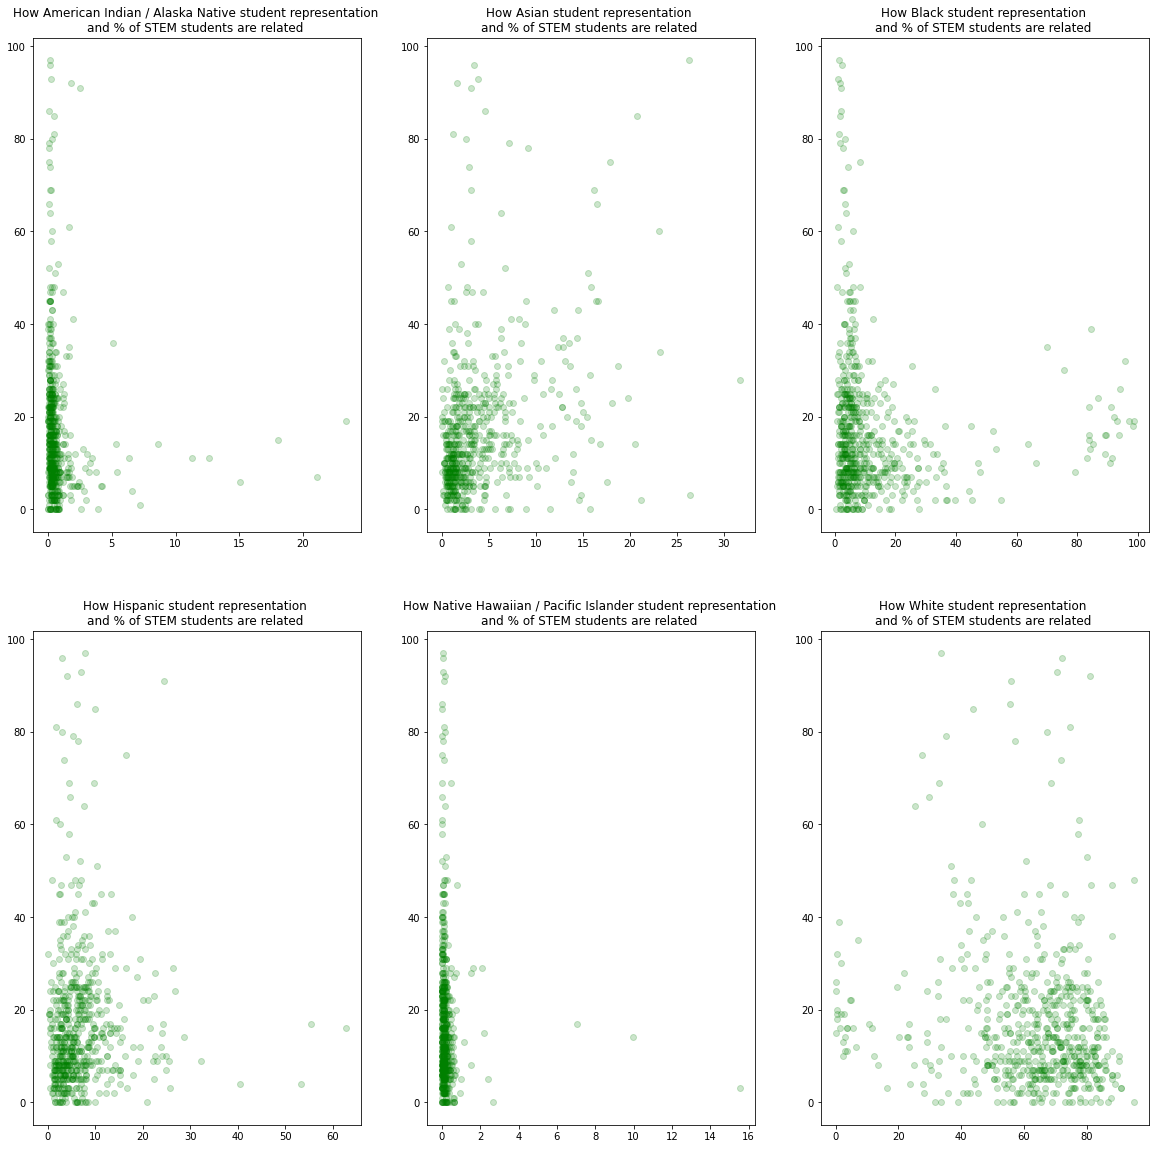

In [54]:
#How different races' representation in colleges is related to STEM percentages
divSalArr = (diversitySalary.columns.tolist()[3:8] + diversitySalary.columns.tolist()[12:])[0:6]

fig, axs = plt.subplots(2, 3, figsize=[20,20])
counter = 0
for i in range(0,2):
  for j in range(0, 3):
    axs[i][j].scatter(diversitySalary[divSalArr[counter]], diversitySalary['stem_percent'], alpha = 0.2, color = 'green')
    axs[i][j].set_title('How ' + divSalArr[counter] + ' student representation \nand % of STEM students are related ')
    counter += 1

In [55]:
#for income levels 0-48,000, the percent of cost covered
tuition_income['financialAid'] = tuition_income.total_price - tuition_income.net_cost
tuition_income["percentCostCovered"] = (tuition_income.total_price - tuition_income.net_cost) / tuition_income.total_price * 100
tuition_lowerIncome = tuition_income[(tuition_income.income_lvl == "0 to 30,000") | (tuition_income.income_lvl == "30,001 to 48,000")]   #(tuition_income.income_lvl == "30,001 to 48,000")]
avg_tuition_lowerIncome = tuition_lowerIncome.groupby("name").mean().reset_index()
avg_tuition_lowerIncome.sort_values("percentCostCovered", ascending = False).head(10)


#cost_salary = pd.DataFrame(avg_tuition_lowerIncome, columns = ['name', 'state_code', 'in_state_total', 'out_of_state_total', 'early_career_pay', 'mid_career_pay', 'make_world_better_percent', 'stem_percent'])
#cost_salary

,name,total_price,year,net_cost,financialAid,percentCostCovered
1806,Miami Ad School-Wynwood,61190.0,2017.500000,0.0,61190.0,100.0
3642,Yeshiva Zichron Aryeh,22513.5,2017.500000,0.0,22513.5,100.0
3413,Virginia Beach Theological Seminary,30485.0,2017.000000,0.0,30485.0,100.0
3443,Virginia International University,22912.0,2017.333333,0.0,22912.0,100.0
2107,Northeast Lakeview College,20816.0,2017.500000,0.0,20816.0,100.0
2881,Studio Incamminati,33578.5,2017.500000,0.0,33578.5,100.0
2865,Strayer University-Arkansas,28387.5,2017.500000,0.0,28387.5,100.0
2249,PACIFIC BIBLE COLLEGE,14950.0,2017.500000,0.0,14950.0,100.0
1805,Miami Ad School-San Francisco,61190.0,2017.500000,0.0,61190.0,100.0
1804,Miami Ad School-New York,61190.0,2017.500000,0.0,61190.0,100.0


In [56]:
#using dict for state abbrev
avg_tuition_lowerIncome['state'] = avg_tuition_lowerIncome.name.apply(lambda x: state_dict[x])

In [57]:
#subsetting columns - Top 20 for financial aid for the lowest tax brackets - among schools who have data available on career projections - expands upon the last exploration we did - paint s abigger picture by accounting for fin aid
cstSalFinAid = pd.merge(cost_salary, avg_tuition_lowerIncome, on = "name")
cstSalFinAid = pd.DataFrame(cstSalFinAid, columns = ['name', 'in_state_total', 'out_of_state_total', 'early_career_pay', 'mid_career_pay', 'in_state_careerCostRatio', 'out_state_careerCostRatio', 'salary_percentGrwth', 'net_cost', 'financialAid', 'percentCostCovered', 'state'])
cstSalFinAid.sort_values("percentCostCovered", ascending = False).head(50).sort_values('early_career_pay', ascending = False)[['name', 'state', 'percentCostCovered', 'early_career_pay']].head(10).sort_values('percentCostCovered', ascending = False)
#cstSalFinAid.sort_values("percentCostCovered", ascending = False).head(50).sort_values('in_state_careerCostRatio', ascending = False)[['name', 'state', 'percentCostCovered', 'in_state_careerCostRatio']].head(10).sort_values('percentCostCovered', ascending = False)


,name,state,percentCostCovered,early_career_pay
470,Stanford University,CA,95.186766,79000.0
144,Duke University,NC,93.738474,71100.0
394,Princeton University,NJ,93.482443,75200.0
685,Yale University,CT,90.441475,70300.0
287,Massachusetts Institute of Technology,MA,90.283314,86300.0
62,California Institute of Technology,CA,89.933769,84100.0
579,University of Pennsylvania,PA,89.556001,72800.0
407,Rice University,TX,87.668465,71000.0
129,Dartmouth College,NH,86.639580,71500.0
202,Harvey Mudd College,CA,80.919432,88800.0


In [58]:
#Rankings for highest salaries
cstSalFinAid.sort_values('mid_career_pay', ascending = False)
cstSalFinAid.sort_values('mid_career_pay', ascending = False).head(10)[['name', 'early_career_pay', 'mid_career_pay']]


,name,early_career_pay,mid_career_pay
202,Harvey Mudd College,88800.0,158200.0
287,Massachusetts Institute of Technology,86300.0,155200.0
62,California Institute of Technology,84100.0,151600.0
470,Stanford University,79000.0,145200.0
5,Albany College of Pharmacy and Health Sciences,81000.0,144800.0
479,SUNY Maritime College,74900.0,140700.0
475,Stevens Institute of Technology,75100.0,139900.0
113,Colorado School of Mines,75600.0,139600.0
394,Princeton University,75200.0,139400.0
685,Yale University,70300.0,138300.0


In [59]:
#Rankings for highest out of state costs
cstSalFinAid.sort_values('out_of_state_total', ascending = False)

,name,in_state_total,out_of_state_total,early_career_pay,mid_career_pay,in_state_careerCostRatio,out_state_careerCostRatio,salary_percentGrwth,net_cost,financialAid,percentCostCovered,state
202,Harvey Mudd College,75003,75003,88800.0,158200.0,1.183953,1.183953,78.153153,12844.447109,54869.927891,80.919432,CA
520,University of Chicago,74580,74580,64000.0,114200.0,0.858139,0.858139,78.437500,5876.227536,63129.022464,91.005786,IL
26,Barnard College,72257,72257,59200.0,109800.0,0.819298,0.819298,85.472973,9214.086257,53379.325508,84.445719,NY
497,Trinity College,71660,71660,60100.0,110900.0,0.838683,0.838683,84.525790,10602.173919,55558.959414,83.917129,CT
594,University of Southern California,71620,71620,64500.0,120600.0,0.900586,0.900586,86.976744,16217.236444,49239.116497,75.059320,CA
...,...,...,...,...,...,...,...,...,...,...,...,...
192,Granite State College,9645,10875,43500.0,76900.0,4.510109,4.000000,76.781609,13525.189388,6149.477278,31.181952,NH
490,Thomas Edison State University,7519,9967,52500.0,95600.0,6.982311,5.267382,82.095238,0.000000,14779.500000,100.000000,NJ
33,Bellevue College,4258,9689,50100.0,88500.0,11.766087,5.170812,76.646707,6647.286653,11073.013347,62.363945,WA
57,Brigham Young University-Idaho,8710,8710,53700.0,93500.0,6.165327,6.165327,74.115456,6107.552684,6102.800257,50.116314,ID


In [60]:
#corr between cost covered and ratio of cost to initial earning - in state
cstSalFinAid.percentCostCovered.corr(cstSalFinAid.in_state_careerCostRatio)

-0.3112800591546668

In [61]:
#corr between cost covered and ratio of cost to initial earning - out state

cstSalFinAid.percentCostCovered.corr(cstSalFinAid.out_state_careerCostRatio)

-0.32091593138473895

In [62]:
#corr between cost covered and ratio of cost to initial earning - out state
cstSalFinAid.percentCostCovered.corr(cstSalFinAid.salary_percentGrwth)

0.30650607780540023

In [63]:
#correlation between the strength of STEM program and the initial earnings
cost_salary.stem_percent.corr(cost_salary.early_career_pay) #pretty strong positive correlation

0.6279641873887459

In [64]:
#Scatterplot showing a college's  of STEM studenys is related to early career salary, colored on mid career salary
fig8 = px.scatter(cost_salary, x = 'stem_percent', y = 'early_career_pay', title="How A College's % of Students in STEM affects Early Career Salary ",  
                 labels=dict(Women="% of Students in STEM", salary_percentGrwth="Early Career Salary ($)"),
                 color = "mid_career_pay", color_continuous_scale=px.colors.sequential.deep, hover_data=['name', 'salary_percentGrwth'])
fig8.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)'})
fig8.show()

In [65]:
#top 20 STEM schools
cost_salary.sort_values('stem_percent', ascending = False).head(10)[['name', 'state_code', 'stem_percent']]

,name,state_code,stem_percent
304,California Institute of Technology,CA,97.0
2020,Rose-Hulman Institute of Technology,IN,96.0
570,Colorado School of Mines,CO,93.0
2166,South Dakota School of Mines and Technology,SD,92.0
1634,New Mexico Institute of Mining and Technology,NM,91.0
345,Capitol Technology University,MD,88.0
2939,Worcester Polytechnic Institute,MA,86.0
994,Harvey Mudd College,CA,85.0
1467,Michigan Technological University,MI,81.0
1523,Missouri University of Science and Technology,MO,80.0


In [66]:
#work with some functions
#function for getting the schools in each state with the best financial aid
def stateFinAid(state):
  df = cstSalFinAid[cstSalFinAid['state'] == state].sort_values('percentCostCovered', ascending = False).head(20)
  return df

stateFinAid("CA")



,name,in_state_total,out_of_state_total,early_career_pay,mid_career_pay,in_state_careerCostRatio,out_state_careerCostRatio,salary_percentGrwth,net_cost,financialAid,percentCostCovered,state
470,Stanford University,67117,67117,79000.0,145200.0,1.177049,1.177049,83.797468,2962.335740,60860.597593,95.186766,CA
62,California Institute of Technology,67887,67887,84100.0,151600.0,1.238823,1.238823,80.261593,6209.711342,56226.476158,89.933769,CA
390,Pomona College,69496,69496,63800.0,117200.0,0.918038,0.918038,83.699060,6247.221912,55465.244755,89.894037,CA
91,Claremont McKenna College,71110,71110,68500.0,125400.0,0.963296,0.963296,83.065693,9931.601628,56022.469801,84.735110,CA
202,Harvey Mudd College,75003,75003,88800.0,158200.0,1.183953,1.183953,78.153153,12844.447109,54869.927891,80.919432,CA
594,University of Southern California,71620,71620,64500.0,120600.0,0.900586,0.900586,86.976744,16217.236444,49239.116497,75.059320,CA
437,Santa Clara University,66621,66621,69900.0,134700.0,1.049219,1.049219,92.703863,21807.644912,41239.917588,65.019873,CA
588,University of San Francisco,62896,62896,60600.0,109900.0,0.963495,0.963495,81.353135,22929.930061,38294.569939,62.342257,CA
587,University of San Diego,62338,62338,58900.0,109400.0,0.944849,0.944849,85.738540,23548.445508,37375.848609,61.350037,CA
294,Menlo College,57025,57025,61900.0,112400.0,1.085489,1.085489,81.583199,23467.832969,32877.033698,58.389116,CA


In [67]:
#best schools for price range out/in

def tuitionLimitFilter(state, state_status, limit):
  if state_status == "in state":
    df = cstSalFinAid[(cstSalFinAid.state == state) & (cstSalFinAid.in_state_total < limit)].sort_values('in_state_total')
    return df.head(20)
  elif state_status == "out of state":
    df = cstSalFinAid[(cstSalFinAid.state == state) & (cstSalFinAid.out_of_state_total < limit)].sort_values("out_of_state_total")
    return df.head(10)[['name', 'in_state_total', 'out_of_state_total']]

tuitionLimitFilter("VA", "out of state", 50000)


,name,in_state_total,out_of_state_total
630,Virginia State University,20264,30784
398,Radford University,20616,32251
225,Jefferson College of Health Sciences,32756,32756
199,Hampton University,38480,38480
224,James Madison University,22108,38508
557,University of Mary Washington,23306,38552
90,Christopher Newport University,26214,38680
629,Virginia Polytechnic Institute and State Unive...,22554,40238
262,Longwood University,25086,41046
378,Old Dominion University,22492,41392


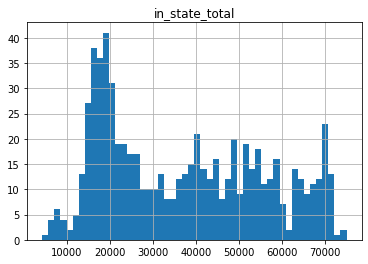

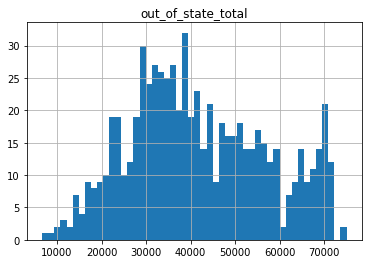

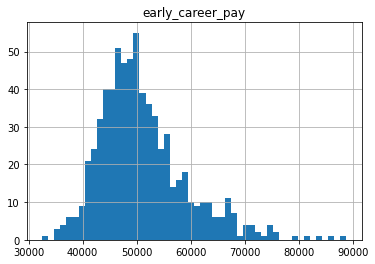

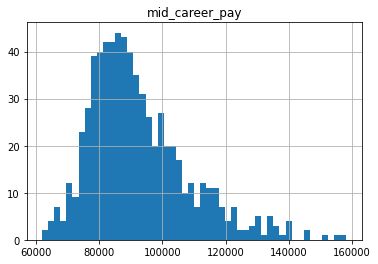

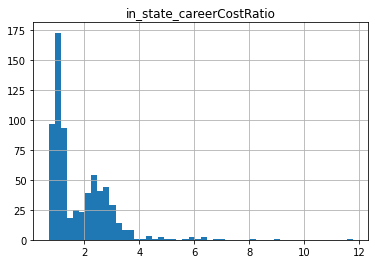

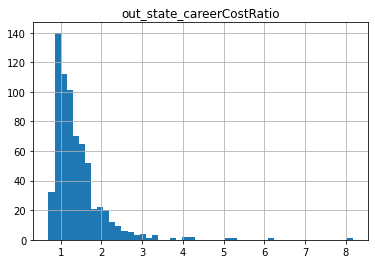

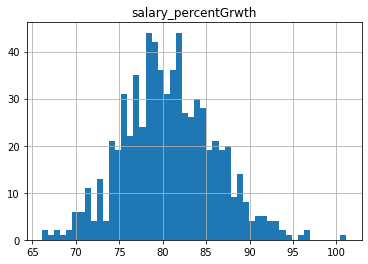

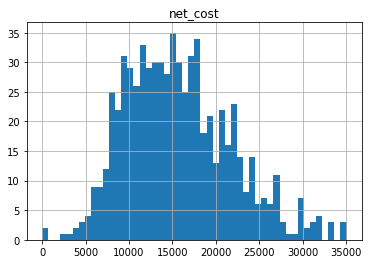

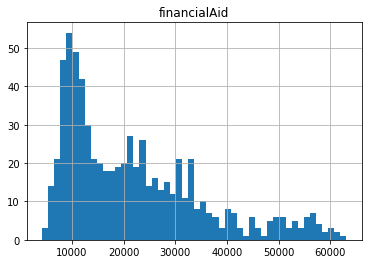

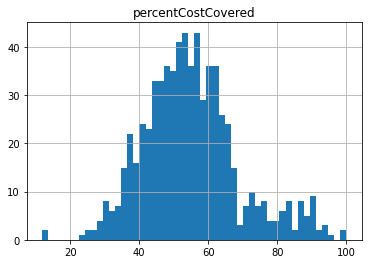

In [68]:
#observations about the distribution of the variables -- analysze skew, normal?
for i in cstSalFinAid.columns[1:11]:
  cstSalFinAid.hist(column = i, bins = 50)


In [69]:

cstSalFinAid.to_csv(r'C:\Users\spsup\OneDrive\Desktop\Desktop\export_cstSalFinAid.csv', index = False, header = True)

In [70]:
cost_salary.to_csv(r'C:\Users\spsup\OneDrive\Desktop\Desktop\export_cost_salary.csv', index = False, header = True)

In [71]:
diversitySalary.to_csv(r'C:\Users\spsup\OneDrive\Desktop\Desktop\export_diversitySalary.csv', index = False, header = True)


In [72]:
tuition_income.to_csv(r'C:\Users\spsup\OneDrive\Desktop\Desktop\export_tuition_income.csv', index = False, header = True)

Presentation:
To data smart manager

Note: as this task is a bit broader than the rest by nature, feel free to create one or several “case studies” in addition to (or perhaps instead of) your general recommendations, showing what schools you would recommend to 
collEDGE is also interested in any general insights about trends in campus diversity, expected salary, tuition, etc. that you’re able to find, as they market to students primarily through blog posts on these topics.

Introduce data, background, your task, how I cleaned it, lists of colleges, all visuals (general trends), findings, future work
Label slides with findings 
Talk about data transformation, cleaning, choices made

Hypothesis

Emphasize the practical / business case


Stakeholders:
collEDGE as a publichser on college info to students
High schoolers of all backgrounds and their families
The colleges whom they are advertising about - must be accurate
Colleges stand to benefit and be harmed
Ideally, students stand to only benefit